In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Two ways to transform data 
----

In [ ]:
df = pd.read_csv("data/car-sales-extended.csv")

In [ ]:
df.head()

* First way using OneHotEncoder & ColumnTransformer

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
catogery = ["Make","Colour","Doors"]
one_hot  = OneHotEncoder()
transformer = ColumnTransformer([("one hot",one_hot,catogery)],remainder="passthrough")

transformed_x = transformer.fit_transform(df)

In [ ]:
trans_df = pd.DataFrame(transformed_x,columns=[dummy_data.columns])

In [ ]:
trans_df

* Second Way using pandas get_dummies() function

In [ ]:
dummy_data = pd.get_dummies(df,columns=["Make","Colour","Doors"])
dummy_data

In [ ]:
dummy_data.drop(["Odometer (KM)","Price"],axis=1)
trans_df.drop(["Odometer (KM)","Price"],axis=1)

# Confusion Matrix
----

In [2]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split

In [3]:
breast_df = pd.read_csv("data/dataR2.csv")
breast_df.sample(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
73,72,23.620000,105,4.420,1.144780,21.7800,17.860000,4.82000,195.940,2
102,65,30.915577,97,10.491,2.510147,44.0217,3.710090,20.46850,396.648,2
14,38,23.340000,75,5.782,1.069670,15.2600,17.950000,9.35000,165.020,1
96,44,27.887617,99,9.208,2.248594,12.6757,5.478170,23.03306,407.206,2
59,62,22.656250,92,3.482,0.790182,9.8648,11.236235,10.69548,703.973,2


* Details about data

In [12]:
about_data = "There are 10 predictors, all quantitative, and a binary dependent variable, indicating the presence or absence of breast cancer.The predictors are anthropometric data and parameters which can be gathered in routine blood analysis.Prediction models based on these predictors, if accurate, can potentially be used as a biomarker of breast cancer."
string = about_data.split(sep='.')
feature = "Features:. Age (years).BMI (kg/m2). Glucose (mg/dL)Insulin (µU/mL).HOMA.Leptin (ng/mL).Adiponectin (µg/mL).Resistin (ng/mL).MCP-1(pg/dL)"
labels = "Labels:.1=Healthy controls.2=Patients"
about = {
    'Details': (feature.split('.'),labels.split('.')),
    'Info': string
}
y = []
for x in about:
    y.append(str(about[x]))
    print(y)
with open("data/Breast_cancer_info.txt",'w') as f:
    f.write(str(y))

In [ ]:
1 : healthy = 0
2 : Breast patient = 1

In [4]:
breast_df['Classification'] = breast_df['Classification'].replace({1:0,2:1})

In [5]:
breast_df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,1
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,1
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,1
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,1


* Splitting the data .. 

In [6]:
X_train,X_test,y_train,y_test = train_test_split(breast_df.drop('Classification',axis=1),
                                                 breast_df['Classification'],
                                                 random_state=101,
                                                 test_size=0.3)
log = LogisticRegression(max_iter=100,random_state=101)
sgd = SGDClassifier(max_iter=100,random_state=101)
dtree = DecisionTreeClassifier(random_state=101)
forest = RandomForestClassifier(n_estimators=100,random_state=101)

* Training the models and predicting probability matrix

In [8]:
log.fit(X_train,y_train)
log_pb = log.predict_proba(X_test)[:,1]
log_pred = log.predict(X_test)

sgd.fit(X_train,y_train)
# sgd_pb = sgd.predict_proba(X_test)
sgd_pred = sgd.predict(X_test)

dtree.fit(X_train,y_train)
dtree_pb = dtree.predict_proba(X_test)
dtree_pred = dtree.predict(X_test)

forest.fit(X_train,y_train)
forest_pb = forest.predict_proba(X_test)
forest_pred = forest.predict(X_test)


/home/Bing0/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
print(roc_auc_score(y_test_int, log_pred))
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_int, log_pred)
print(fpr_lr, tpr_lr, thresholds_lr)

0.7500000000000001
[0.         0.21428571 1.        ] [0.         0.71428571 1.        ] [2 1 0]


In [10]:
print(roc_auc_score(y_test, log_pb))
auc_lor = roc_auc_score(y_test, log_pb)
fpr_lor, tpr_lor, thresholds_lor = roc_curve(y_test, log_pb)
print(fpr_lor, tpr_lor, thresholds_lor)

0.7925170068027211
[0.         0.         0.         0.07142857 0.07142857 0.14285714
 0.14285714 0.21428571 0.21428571 0.35714286 0.35714286 0.64285714
 0.64285714 0.85714286 0.85714286 1.        ] [0.         0.04761905 0.28571429 0.28571429 0.57142857 0.57142857
 0.66666667 0.66666667 0.71428571 0.71428571 0.85714286 0.85714286
 0.9047619  0.9047619  1.         1.        ] [1.99749923 0.99749923 0.94953741 0.94586901 0.69744637 0.68345709
 0.62138318 0.59733531 0.52493583 0.45096785 0.42035373 0.32971005
 0.30427813 0.21051878 0.1579329  0.08808352]


In [124]:
y_test_int = y_test.replace({1:0,2:1})

In [12]:

auc_lr = roc_auc_score(y_test, log_pred)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, log_pred)

auc_sg = roc_auc_score(y_test, sgd_pred)
fpr_sg, tpr_sg, thresholds_sg = roc_curve(y_test, sgd_pred)

auc_dt = roc_auc_score(y_test, dtree_pred)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dtree_pred)

auc_ft = roc_auc_score(y_test, forest_pred)
fpr_ft, tpr_ft, thresholds_ft = roc_curve(y_test, forest_pred)

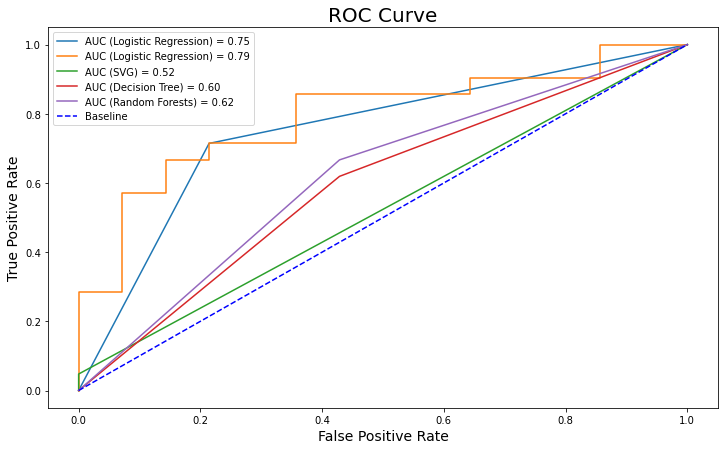

In [13]:
plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}') # using direct prediction values
plt.plot(fpr_lor, tpr_lor, label=f'AUC (Logistic Regression) = {auc_lor:.2f}') #using probability prediction.
plt.plot(fpr_sg, tpr_sg, label=f'AUC (SVG) = {auc_sg:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_ft, tpr_ft, label=f'AUC (Random Forests) = {auc_ft:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

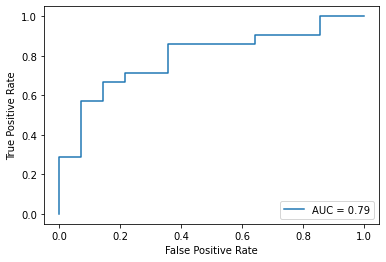

In [119]:
auc_lor = auc(fpr_lor,tpr_lor)
plot = RocCurveDisplay(fpr=fpr_lor,tpr=tpr_lor,roc_auc=auc_lor)
plot.plot();